# Introduction to PyMC3

In [1]:
import sys
sys.version

'3.7.5 (default, Nov  7 2019, 10:50:52) \n[GCC 8.3.0]'

In [2]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import pandas as pd
import theano.tensor as tt
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
sns.set()

np.random.seed(42)
np.seterr(divide = 'ignore') 

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Fri Jan 29 2021

Python implementation: CPython
Python version       : 3.7.5
IPython version      : 7.19.0

numpy     : 1.19.5
pymc3     : 3.11.0
matplotlib: 3.3.3
seaborn   : 0.11.1
arviz     : 0.11.0
pandas    : 1.2.1
theano    : 1.1.0
scipy     : 1.6.0
sys       : 3.7.5 (default, Nov  7 2019, 10:50:52) 
[GCC 8.3.0]

Watermark: 2.1.0



In [4]:
with pm.Model() as model:
    x = pm.Normal('x', mu=0, sd=1)
    y = pm.Deterministic('y', 3 + x)
    trace = pm.sample(1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


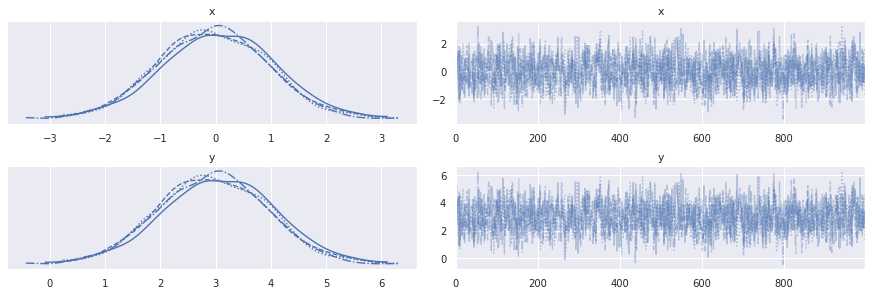

In [5]:
az.plot_trace(trace);

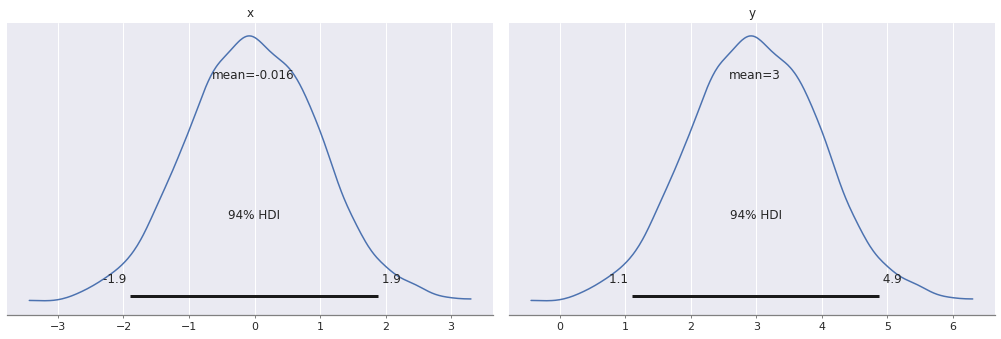

In [6]:
az.plot_posterior(trace);

- arviz.InferenceData: 
https://arviz-devs.github.io/arviz/api/inference_data.html

In [7]:
trace

Inference data with groups:
	> posterior
	> sample_stats

In [8]:
trace.posterior.x

<xarray.DataArray 'x' (chain: 4, draw: 1000)>
array([[-0.04071867,  0.68585576,  2.26605635, ..., -0.21002098,
        -0.4833205 ,  0.43842239],
       [ 0.49520313,  1.00220634,  0.20344341, ...,  1.5344466 ,
        -1.60507639, -1.60507639],
       [-0.39658224, -1.26843849, -0.55552661, ..., -0.43883028,
         0.30495926,  0.07315134],
       [ 1.26530398,  2.90680516,  2.15017456, ..., -0.4961339 ,
        -0.08068155,  0.02473768]])
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

In [9]:
df = trace.to_dataframe()
df.describe()

,chain,draw,"(posterior, x)","(posterior, y)","(sample_stats, energy)","(sample_stats, energy_error)","(sample_stats, perf_counter_start)","(sample_stats, perf_counter_diff)","(sample_stats, mean_tree_accept)","(sample_stats, max_energy_error)","(sample_stats, step_size)","(sample_stats, lp)","(sample_stats, depth)","(sample_stats, tree_size)","(sample_stats, step_size_bar)","(sample_stats, process_time_diff)"
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1.500000,499.500000,-0.016012,2.983988,1.927229,0.000030,58218.364332,0.000245,0.845941,0.208503,1.151788,-1.418610,1.539250,2.078500,1.303080,0.000245
std,1.118174,288.711081,0.999668,0.999668,0.996760,0.391298,0.100949,0.000080,0.215341,0.700281,0.058089,0.697746,0.498519,0.997039,0.032884,0.000080
min,0.000000,0.000000,-3.444174,-0.444174,0.919477,-2.452145,58218.166278,0.000147,0.001757,-2.452145,1.084679,-6.850106,1.000000,1.000000,1.261621,0.000147
25%,0.750000,249.750000,-0.690868,2.309132,1.213571,-0.099587,58218.277717,0.000165,0.772950,-0.123054,1.123533,-1.561371,1.000000,1.000000,1.278457,0.000165
50%,1.500000,499.500000,-0.030024,2.969976,1.616833,0.000000,58218.365832,0.000286,0.947587,0.074054,1.138855,-1.153015,2.000000,3.000000,1.301483,0.000287
75%,2.250000,749.250000,0.675415,3.675415,2.321668,0.096891,58218.449119,0.000304,1.000000,0.423423,1.167110,-0.972772,2.000000,3.000000,1.326107,0.000304
max,3.000000,999.000000,3.310099,6.310099,8.472707,2.482811,58218.583865,0.000899,1.000000,6.344028,1.244764,-0.918939,2.000000,3.000000,1.347733,0.000899


In [10]:
trace.to_dataframe(['posterior'])

,chain,draw,x,y
0,0,0,-0.040719,2.959281
1,0,1,0.685856,3.685856
2,0,2,2.266056,5.266056
3,0,3,0.782633,3.782633
4,0,4,-0.427375,2.572625
...,...,...,...,...
3995,3,995,0.583002,3.583002
3996,3,996,-0.809934,2.190066
3997,3,997,-0.496134,2.503866
3998,3,998,-0.080682,2.919318


# Coin Toss

In [11]:
n = 100
h = 61
alpha = 2
beta = 2

niter = 1000
with pm.Model() as model: # context management
    # define priors
    p = pm.Beta('p', alpha=alpha, beta=beta)

    # define likelihood
    y = pm.Binomial('y', n=n, p=p, observed=h)

    # inference
    trace = pm.sample(niter, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [12]:
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [13]:
trace.posterior

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 1000)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
Data variables:
    p        (chain, draw) float64 0.5621 0.5621 0.567 ... 0.5715 0.5747 0.5731
Attributes:
    created_at:                 2021-01-28T23:46:59.627324
    arviz_version:              0.11.0
    inference_library:          pymc3
    inference_library_version:  3.11.0
    sampling_time:              0.9688944816589355
    tuning_steps:               1000

In [14]:
trace.posterior.p

<xarray.DataArray 'p' (chain: 4, draw: 1000)>
array([[0.56205084, 0.56205084, 0.56701637, ..., 0.63611368, 0.64967067,
        0.69142154],
       [0.62490578, 0.58718505, 0.56834329, ..., 0.64495374, 0.6478897 ,
        0.62426749],
       [0.64791473, 0.63306063, 0.59926134, ..., 0.57892456, 0.60959919,
        0.58891099],
       [0.52761587, 0.684428  , 0.656958  , ..., 0.57147073, 0.57470187,
        0.57305331]])
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

In [15]:
trace.posterior.p[0, :10]

<xarray.DataArray 'p' (draw: 10)>
array([0.56205084, 0.56205084, 0.56701637, 0.52035578, 0.59296091,
       0.59296091, 0.57970871, 0.5511284 , 0.64334918, 0.61276825])
Coordinates:
    chain    int64 0
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 9

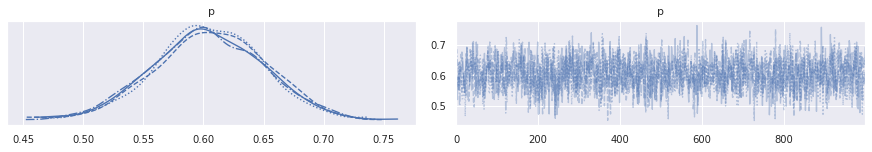

In [16]:
axes = az.plot_trace(trace);

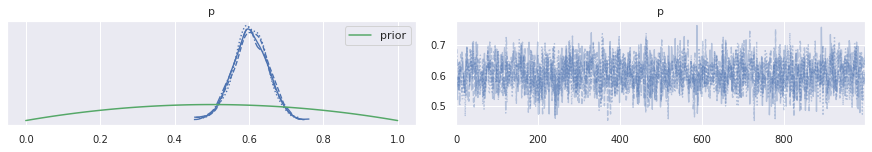

In [17]:
axes = az.plot_trace(trace);
x = np.linspace(0,1,100)
axes[0,0].plot(x, stats.beta(alpha, beta).pdf(x), 'g', label='prior');
axes[0,0].legend();

# Estimating mean and std of normal distribution

In [18]:
# generate observed data
N = 100
_mu = np.array([10])
_sigma = np.array([2])
y = np.random.normal(_mu, _sigma, N)

niter = 1000
with pm.Model() as model:
    # define priors
    mu = pm.Uniform('mu', lower=0, upper=100, shape=_mu.shape)
    sigma = pm.Uniform('sigma', lower=0, upper=10, shape=_sigma.shape)

    # define likelihood
    y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=y)

    # inference
    start = pm.find_MAP()
    trace = pm.sample(niter, start=start, random_seed=123, progressbar=True, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


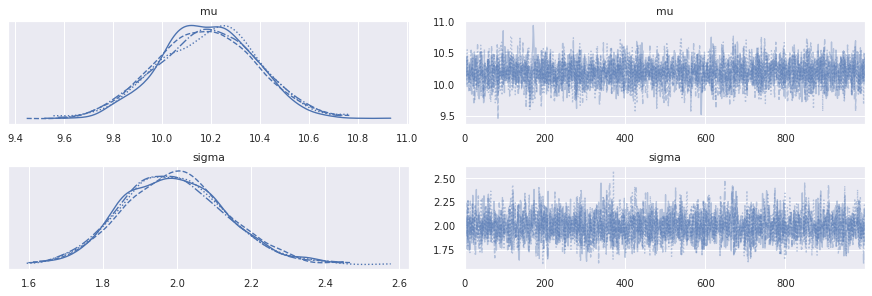

In [19]:
az.plot_trace(trace);

In [20]:
y.mean(), y.std()

(10.186845341761929, 1.9578733412469558)

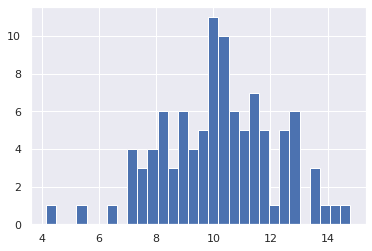

In [21]:
plt.hist(y, bins=30);

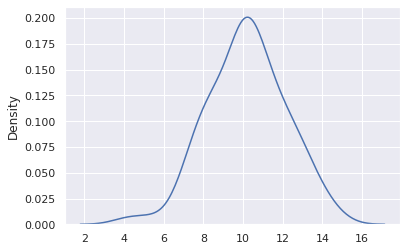

In [22]:
sns.kdeplot(y);

# Linear regression model
$$
y \sim ax + b
$$
$$
y \sim \mathcal{N}(ax+b, \sigma^2)
$$

In [23]:
# observed data
n = 11
_a = 6
_b = 2
x = np.linspace(0, 1, n)
y = _a*x + _b + np.random.randn(n)
true_regression_line = _b + _a * x

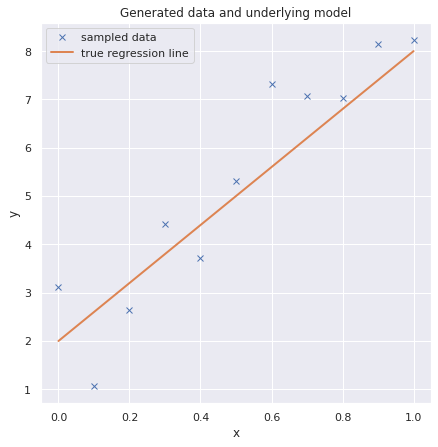

In [24]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);

In [25]:
with pm.Model() as model:
    a = pm.Normal('a', mu=0, sd=20)
    b = pm.Normal('b', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=20)

    y_est = a*x + b # simple auxiliary variables

    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
    
    # inference
    start = pm.find_MAP()
    trace = pm.sample(niter, start=start, random_seed=123, progressbar=True, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


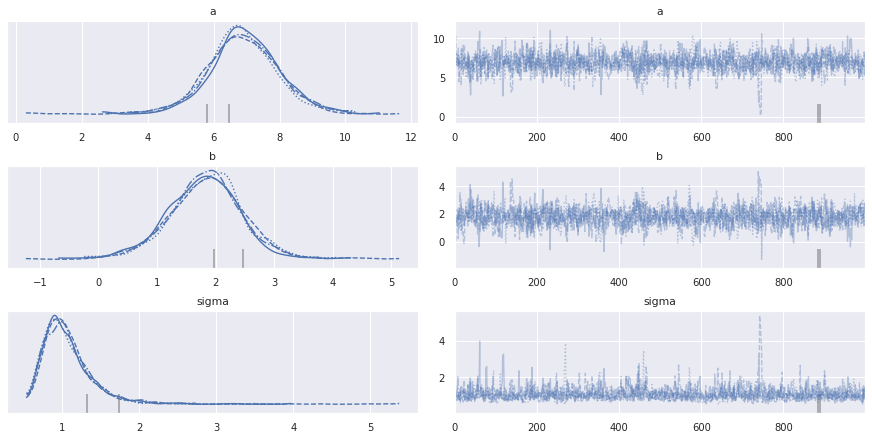

In [26]:
az.plot_trace(trace);

In [27]:
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [28]:
trace.posterior.a.data

array([[ 6.02124453,  7.75939524,  8.31048482, ...,  5.34033645,
         5.34033645,  5.2017155 ],
       [ 9.04914156,  6.78127802,  7.43479497, ...,  7.65562521,
         7.9846351 ,  5.96804486],
       [ 4.65591523, 11.63967048, 10.59013078, ...,  6.48304124,
         6.34874058,  5.14771992],
       [ 8.02363573,  8.02363573,  8.02363573, ...,  8.2359738 ,
         7.24029392,  7.7563583 ]])

NameError: name 'k' is not defined

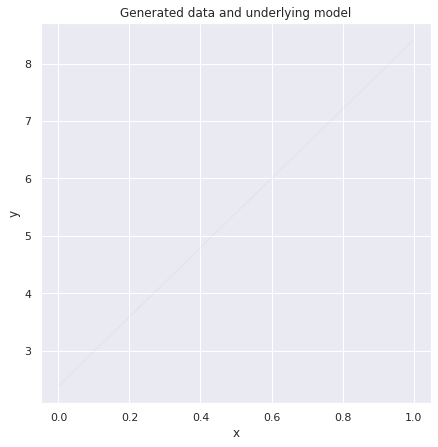

In [29]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
# parameter samples from posterior distribution
for aa, bb in zip(trace.posterior.a.data[0], trace.posterior.b.data[0]):
    yy = aa * x + bb
    ax.plot(x, yy, 'g', alpha=.05)
    k += 1
#
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);


# Alternative method using `pymc3.GLM`
- https://docs.pymc.io/notebooks/GLM-linear.html

In [ ]:
data = dict(x=x,y=y)

with pm.Model() as model:
    pm.GLM.from_formula('y ~ x', data=data)
    trace = pm.sample(2000, return_inferencedata=True)

In [ ]:
az.plot_trace(trace);

In [ ]:
trace

In [ ]:
trace.posterior.Intercept

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
# parameter samples from posterior distribution
for aa, bb in zip(trace.posterior.x.data[0], trace.posterior.Intercept.data[0]):
    yy = aa * x + bb
    ax.plot(x, yy, 'g', alpha=.05)
    k += 1
#
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);


# Simple Logistic Model
We have observations of height and weight and want to use a logistic model to guess the gender.

In [ ]:
df = pd.read_csv('data/HtWtData30.csv')
df.head()

In [ ]:
sns.pairplot(df, hue='male', diag_kind='hist');

In [ ]:
sns.pairplot(df, hue='male', diag_kind='kde');

In [ ]:
with pm.Model() as model:
    b0 = pm.Normal('b0', mu=0, sd=20)
    b1 = pm.Normal('b1', mu=0, sd=20)
    b2 = pm.Normal('b2', mu=0, sd=20)
    mu = pm.Deterministic('mu', b0 + b1 * df.weight.values + b2 * df.height.values)
    theta = pm.Deterministic('theta', pm.math.sigmoid(mu))
    likelihood = pm.Bernoulli('y', p=theta, observed=df.male.values)

In [ ]:
with model:
    trace = pm.sample(2000, return_inferencedata=True)

In [ ]:
trace

In [ ]:
az.plot_trace(trace);

In [ ]:
def sigmoid(x):
    return 1./(1. + np.exp(-x))

In [ ]:
#     mu = b0 + b1 * df.weight.values + b2 * df.height.values
mean = trace.posterior.mean()

df['mu'] = mean.b0.data + mean.b1.data * df.weight + mean.b2.data * df.height
df['theta'] = df.mu.map(lambda x: sigmoid(x))
df.head()

In [ ]:
cdict = {0: 'red', 1: 'blue'}
cd = [cdict[g] for g in df.male]
plt.scatter(df.weight, df.theta, c=cd);
# plt.legend()
plt.xlabel('weight')
plt.ylabel('theta = sigmoid(mu=b0+b1*w+b2*h)');

# mean theta (probability male=1) graph
w = np.linspace(df.weight.min(), df.weight.max(), 100)
h = np.linspace(df.height.min(), df.height.max(), 100)
th = sigmoid(mean.b0.data + mean.b1.data*w + mean.b2.data*h)
plt.plot(w, th);

In [ ]:
trace.posterior.theta

# Refreneces
- http://people.duke.edu/~ccc14/sta-663-2018/notebooks/S11A_PyMC3.html
- https://people.duke.edu/~ccc14/sta-663/PyMC3.html